<center><img src="img/logo.png"></center>

<h1><center>Seminar</center></h1>
<h2><center>Hierarchical Clustering. DBSCAN.</center></h2>

# About

The goal of this seminar is to consider Hierarchical Clustering and DBSCAN algorithms for clustering.

In [1]:
import pandas as pd
import numpy as np
import numpy.testing as np_testing
import matplotlib.pyplot as plt

%matplotlib inline

# Part 1: Hierarchical Clustering

## Data Preparation

In [2]:
from sklearn import datasets

n_samples = 150
random_state = 170
X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=random_state)

# To play with
# X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
# X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
# X = np.random.rand(n_samples, 2)

In [3]:
# example of objects in the feature matrix
X[:5]

array([[-1.02968126,  0.10465734],
       [ 0.06464933,  0.56652277],
       [ 0.42551368,  0.19960435],
       [ 0.56633333, -0.86921149],
       [ 0.35965702, -0.93753825]])

In [4]:
# example of cluster labels
y[:5]

array([0, 1, 1, 0, 0])

In [5]:
# we will use the function below to plot clusters and results of clustering algorithms

def plot_clusters(X, y):

    # Create an figure with a custom size
    # plt.figure(figsize=(6, 4))
    
    if y is not None:
        for cluster_label in np.unique(y):
            # Plot all objects with y == i (class 0)
            plt.scatter(X[y == cluster_label, 0],     # selects all objects with y == i and the 1st column of X
                        X[y == cluster_label, 1],     # selects all objects with y == i and the 2nd column of X
                        label=str(cluster_label))     # label for the plot legend
    else:
        plt.scatter(X[:, 0], X[:, 1], label='samples')

    plt.xlabel('X1', size=12) # set up X-axis label
    plt.ylabel('X2', size=12) # set up Y-axis label
    plt.xticks(size=12)
    plt.yticks(size=12)

    plt.legend(loc='best', fontsize=12) # create the plot legend and set up it position
    plt.grid(b=1) # create grid on the plot

    plt.show() # display the plot

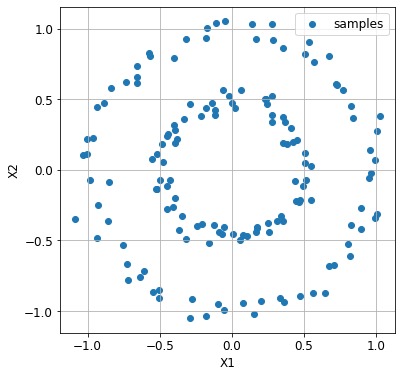

In [6]:
# show clusters in the sample
plt.figure(figsize=(6, 6))
plot_clusters(X, y=None)

## Agglomerative Clustering

<center><img src="img/agglo_1.png"></center>

[image link](https://www.brandidea.com/hierarchicalclustering.html)

Algorithm:

<center><img src="img/agglo_algo.png" width="600"></center>

In [7]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

# calculate distance matrix between points and clusters
Z = linkage(X, method='complete', metric='euclidean')

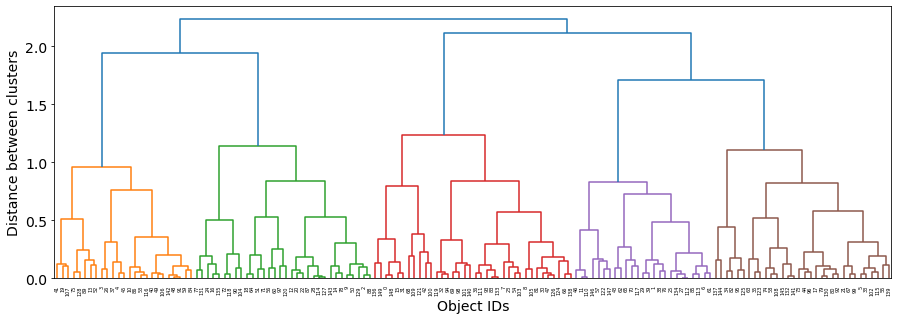

In [8]:
# plot dendrogram using the linkage matrix

plt.figure(figsize=(15, 5))

dend = dendrogram(Z, labels=np.arange(len(X)), orientation='top')

plt.yticks(size=14)
plt.xticks(size=5)
plt.ylabel("Distance between clusters", size=14)
plt.xlabel("Object IDs", size=14)
plt.show()

In [9]:
# find clusters using the linkage matrix
y_pred = fcluster(Z, 2, criterion='maxclust')

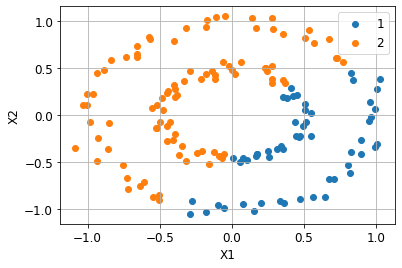

In [10]:
# plot clustering results
plot_clusters(X, y_pred)

### Task 1

Using example above, find the best hyperparameters of the agglomerative clustering algorithm.

**Hint:** try different kinds of linkage methods between clusters.

In [18]:
def my_best_agglo_clustering(X):
    """
    My agglomerative clusterer with the best hyperparameters.

    Parameters:
    -----------
    X: numpy.array
        Object coordinates.
    
    Returns:
    --------
    y_pred: numpy.array
        Estimated cluster labels.
    """

    Z = linkage(X, method='single', metric='euclidean')
    y_pred = fcluster(Z,  2, criterion='maxclust')
    return y_pred

In [19]:
y_pred_best = my_best_agglo_clustering(X)
y_pred_best[:20]

array([2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2],
      dtype=int32)

Expected output:

<center>   
    
```python
array([2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2], dtype=int32)
    
``` 
    
</center>

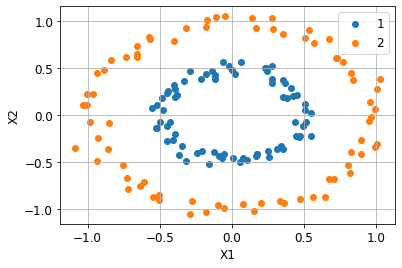

In [20]:
# plot clustering results
plot_clusters(X, y_pred_best)

## Cophenetic correlation

**Cophenetic distance** between objects $x_i$ and $x_j$ - height of dendrogram at which whose two objects have merged:

<center><img src="img/dendro2.png"></center>

\

**Cophenetic correlation** is correlation between Cophenetic distance $coph(x_i, x_j)$ and simple distance $d(x_i, x_j)$ between objects:

$$
CophCorr = \frac{\sum_{i<j} (d(x_i, x_j) - \bar{d})(coph(x_i, x_j) - \bar{coph})}{\sqrt{\sum_{i<j} (d(x_i, x_j) - \bar{d})^2\sum_{i<j}(coph(x_i, x_j) - \bar{coph})^2}}
$$

Usisally, if dendrogram is good, correlation should be high.

### Food Clustering

Consider the following sample of nutritional value of products. It contains the following columns:

- "Name" is the name of the item.
- "Energy" is the number of calories.
- "Protein" is the amount of protein in grams.
- "Fat" is the amount of fat in grams.
- "Calcium" is the amount of calcium in milligrams.
- "Iron" is the amount of iron in milligrams.

In [21]:
# read the data
df = pd.read_csv('data/food.txt', sep=' ')
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [22]:
# prerape matrix X
X = df.iloc[:, 1:]
# make the same scale for all object features
X = (X - X.mean(axis=0)) / X.std(axis=0)

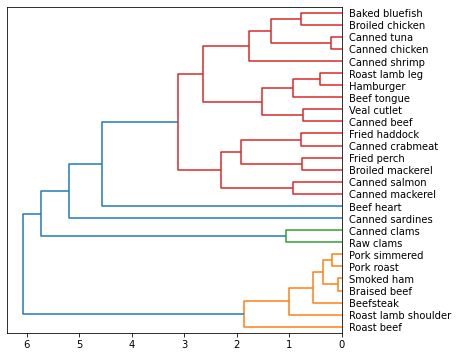

In [23]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# calculate distance matrix between points and clusters
Z = linkage(X, method='complete', metric='euclidean')

# plot dendrogram
plt.figure(figsize=(6, 6))
names = df.Name.values
dend = dendrogram(Z, labels=names, orientation='left')

In [24]:
# complute cophenetic correlation
corr, coph_dists = cophenet(Z, pdist(X))
print("Cophenetic correlation: ", corr)

Cophenetic correlation:  0.7136761439194088


In [25]:
# select clusters with the max distance 2.5 between them
y_pred = fcluster(Z, 2.5, criterion='distance')

In [26]:
# add labels to the data
df.loc[:, 'labels'] = y_pred

# display clusters of products
for i, gr in df.groupby('labels'):
    print('Cluster {}'.format(i))
    display(gr)

Cluster 1


,Name,Energy,Protein,Fat,Calcium,Iron,labels
0,Braised beef,340,20,28,9,2.6,1
2,Roast beef,420,15,39,7,2.0,1
3,Beefsteak,375,19,32,9,2.6,1
9,Roast lamb shoulder,300,18,25,9,2.3,1
10,Smoked ham,340,20,28,9,2.5,1
11,Pork roast,340,19,29,9,2.5,1
12,Pork simmered,355,19,30,9,2.4,1


Cluster 2


,Name,Energy,Protein,Fat,Calcium,Iron,labels
16,Raw clams,70,11,1,82,6.0,2
17,Canned clams,45,7,1,74,5.4,2


Cluster 3


,Name,Energy,Protein,Fat,Calcium,Iron,labels
18,Canned crabmeat,90,14,2,38,0.8,3
19,Fried haddock,135,16,5,15,0.5,3
20,Broiled mackerel,200,19,13,5,1.0,3
21,Canned mackerel,155,16,9,157,1.8,3
22,Fried perch,195,16,11,14,1.3,3
23,Canned salmon,120,17,5,159,0.7,3


Cluster 4


,Name,Energy,Protein,Fat,Calcium,Iron,labels
1,Hamburger,245,21,17,9,2.7,4
4,Canned beef,180,22,10,17,3.7,4
8,Roast lamb leg,265,20,20,9,2.6,4
13,Beef tongue,205,18,14,7,2.5,4
14,Veal cutlet,185,23,9,9,2.7,4


Cluster 5


,Name,Energy,Protein,Fat,Calcium,Iron,labels
5,Broiled chicken,115,20,3,8,1.4,5
6,Canned chicken,170,25,7,12,1.5,5
15,Baked bluefish,135,22,4,25,0.6,5
25,Canned tuna,170,25,7,7,1.2,5
26,Canned shrimp,110,23,1,98,2.6,5


Cluster 6


,Name,Energy,Protein,Fat,Calcium,Iron,labels
7,Beef heart,160,26,5,14,5.9,6


Cluster 7


,Name,Energy,Protein,Fat,Calcium,Iron,labels
24,Canned sardines,180,22,9,367,2.5,7


### Task 2

Using the example above, find a linkage method ('complete', 'single', 'average', 'centroid', 'ward') that provides the highest cophenetic correlation. Then, plot the dendrogram and find clusters with the max distance 2.5 between them. 

The best method:  average


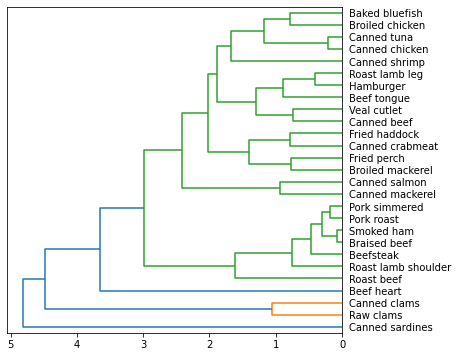

Cluster 1


,Name,Energy,Protein,Fat,Calcium,Iron,labels
16,Raw clams,70,11,1,82,6.0,1
17,Canned clams,45,7,1,74,5.4,1


Cluster 2


,Name,Energy,Protein,Fat,Calcium,Iron,labels
0,Braised beef,340,20,28,9,2.6,2
2,Roast beef,420,15,39,7,2.0,2
3,Beefsteak,375,19,32,9,2.6,2
9,Roast lamb shoulder,300,18,25,9,2.3,2
10,Smoked ham,340,20,28,9,2.5,2
11,Pork roast,340,19,29,9,2.5,2
12,Pork simmered,355,19,30,9,2.4,2


Cluster 3


,Name,Energy,Protein,Fat,Calcium,Iron,labels
1,Hamburger,245,21,17,9,2.7,3
4,Canned beef,180,22,10,17,3.7,3
5,Broiled chicken,115,20,3,8,1.4,3
6,Canned chicken,170,25,7,12,1.5,3
8,Roast lamb leg,265,20,20,9,2.6,3
13,Beef tongue,205,18,14,7,2.5,3
14,Veal cutlet,185,23,9,9,2.7,3
15,Baked bluefish,135,22,4,25,0.6,3
18,Canned crabmeat,90,14,2,38,0.8,3
19,Fried haddock,135,16,5,15,0.5,3


Cluster 4


,Name,Energy,Protein,Fat,Calcium,Iron,labels
7,Beef heart,160,26,5,14,5.9,4


Cluster 5


,Name,Energy,Protein,Fat,Calcium,Iron,labels
24,Canned sardines,180,22,9,367,2.5,5


Output:  [2 3 2 2 3 3 3 4 3 2 2 2 2 3 3 3 1 1 3 3]


In [28]:
Z_best = None
corr_best = 0
method_best = None

for method in ['complete', 'single', 'average', 'centroid', 'ward']:
    
    Z = linkage(X, method)
    corr, coph_dists = cophenet(Z, pdist(X))
    
    
    # check if it is better
    if corr > corr_best:
        corr_best = corr
        Z_best = Z
        method_best = method
print("The best method: ", method_best)



# plot dendrogram
plt.figure(figsize=(6, 6))
names = df.Name.values
dend = dendrogram(Z_best, labels=names, orientation='left')
plt.show()
    
# select clusters with the max distance 2.5 between them
y_pred = fcluster(Z_best, 2.5, criterion='distance')

# add labels to the data
df.loc[:, 'labels'] = y_pred
# display clusters of products
for i, gr in df.groupby('labels'):
    print('Cluster {}'.format(i))
    display(gr)

print("Output: ", y_pred[:20])

Expected output:

<center>   
    
```python
Output: [2 3 2 2 3 3 3 4 3 2 2 2 2 3 3 3 1 1 3 3]
    
``` 
    
</center>

# Part 2: DBSCAN

<center><img src="img/dbscan.png" width="400"></center>

## Data Preparation

In [29]:
from sklearn import datasets

n_samples = 200
random_state = 170
X, y = datasets.make_moons(n_samples=n_samples, noise=0.075, random_state=random_state)

# To play with
# X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
# X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
# X = np.random.rand(n_samples, 2)

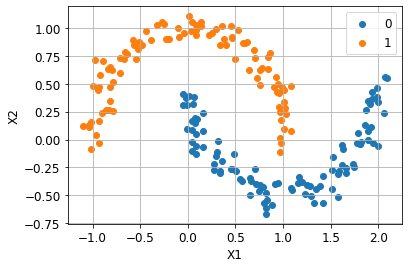

In [40]:
from sklearn.cluster import DBSCAN

# run clusterer
clusterer = DBSCAN(eps=0.23, min_samples=5)
y_pred = clusterer.fit_predict(X)

# plot clustering results
plot_clusters(X, y_pred)

### Task 3
Try to find optimal values of `eps` and `min_samples` parameters above to achieve the best clustering results. How are you going to do this?

How to select parameters of DBSCAN algorithm properly? One more **elbow** method!

In [31]:
from sklearn.neighbors import NearestNeighbors

k = 10

# estimate k neighbors for each point in X
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)

# calculate distances for each of k nearest neighbors
dists, _ = nn.kneighbors(X, n_neighbors=k)

# take distaces only for the k-th neighbors
dist_kth = dists[:, k-1]

# sort the distances
dist_kth.sort()

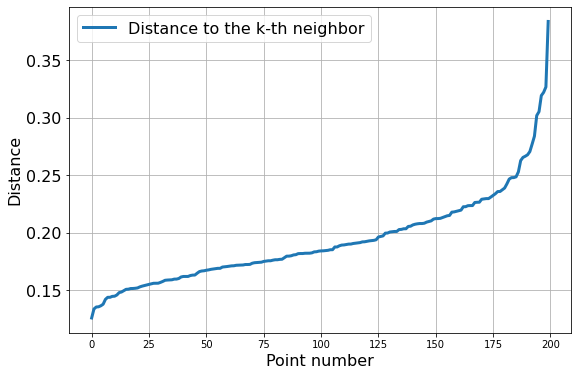

In [32]:
plt.figure(figsize=(9, 6))
plt.plot(dist_kth, linewidth=3, label='Distance to the k-th neighbor')
plt.xlabel('Point number', size=16)
plt.ylabel('Distance', size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)
plt.grid(b=1)
plt.show()